In [301]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

info = pd.read_csv("Loan_Data.csv")
info.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [302]:
info.info()  #get the overall detail of the database

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [303]:
info.apply ( lambda x: sum(x.isnull()), axis=0) #lambda is a temporary fucnction used to identify the missing values in columns of the dataset

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [304]:
info ['Gender'].value_counts() #find out frequency of each data input

Male      489
Female    112
Name: Gender, dtype: int64

In [305]:
info['Gender']=info['Gender'].replace(np.nan, 'Male') #Filling the null values as Male

In [306]:
info ['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [307]:
info['Married']=info['Married'].replace(np.nan, 'Yes') #Filling Yes as the default values

In [308]:
info ['Dependents'].value_counts()# why are we setting the default values to the maximum values

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [309]:
info['Dependents']=info['Dependents'].replace(np.nan, '0') #Filling 0 as the default values

In [310]:
info ['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [311]:
info['Self_Employed']=info['Self_Employed'].replace(np.nan, 'No')

In [312]:
info ['LoanAmount'].value_counts()

120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: LoanAmount, Length: 203, dtype: int64

In [313]:
info['LoanAmount']=info['LoanAmount'].replace(np.nan, info.LoanAmount.mean()) #Setting the mean value as default

In [314]:
info ['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [315]:
info['Loan_Amount_Term']=info['Loan_Amount_Term'].replace(np.nan, 360)

In [316]:
info ['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [317]:
info['Credit_History']=info['Credit_History'].replace(np.nan, 1.0)

In [318]:
info.apply ( lambda x: sum(x.isnull()), axis=0) #check that there is no more mull datas left

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [319]:
info.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [320]:
X=info.iloc[:, 1:12].values #create variable storing all rows but column indices from 1 to 11 (iloc is excluding the last element)

In [321]:
X #the deciding variables

array([['Male', 'No', '0', ..., 360.0, 1.0, 'Urban'],
       ['Male', 'Yes', '1', ..., 360.0, 1.0, 'Rural'],
       ['Male', 'Yes', '0', ..., 360.0, 1.0, 'Urban'],
       ...,
       ['Male', 'Yes', '1', ..., 360.0, 1.0, 'Urban'],
       ['Male', 'Yes', '2', ..., 360.0, 1.0, 'Urban'],
       ['Female', 'No', '0', ..., 360.0, 0.0, 'Semiurban']], dtype=object)

In [322]:
y=info.iloc[:, 12].values #create variable storing only the 12th column values but for all rows

In [323]:
y 

array(['Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N',
       'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'N',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'N

In [324]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=1/3, random_state =0) #random state 0 fixes the random spliiting and the same results are produced everytime you call train_test_split

In [325]:
X_train

array([['Male', 'Yes', '3+', ..., 360.0, 1.0, 'Rural'],
       ['Male', 'Yes', '0', ..., 360.0, 1.0, 'Rural'],
       ['Male', 'Yes', '3+', ..., 180.0, 1.0, 'Rural'],
       ...,
       ['Male', 'Yes', '3+', ..., 360.0, 1.0, 'Semiurban'],
       ['Male', 'Yes', '0', ..., 360.0, 1.0, 'Urban'],
       ['Female', 'Yes', '0', ..., 360.0, 1.0, 'Semiurban']], dtype=object)

In [326]:
from sklearn.preprocessing import LabelEncoder
LabelEncoder_X= LabelEncoder() #LabelEncoder() is a class and we create a object to access the inbuilt function fit_transform

In [327]:
for i in range (0, 5):
    X_train[:, i]= LabelEncoder_X.fit_transform(X_train[:, i])

In [328]:
X_train[:, 10]= LabelEncoder_X.fit_transform(X_train[:, 10])

In [329]:
X_train

array([[1, 1, 3, ..., 360.0, 1.0, 0],
       [1, 1, 0, ..., 360.0, 1.0, 0],
       [1, 1, 3, ..., 180.0, 1.0, 0],
       ...,
       [1, 1, 3, ..., 360.0, 1.0, 1],
       [1, 1, 0, ..., 360.0, 1.0, 2],
       [0, 1, 0, ..., 360.0, 1.0, 1]], dtype=object)

In [330]:
LabelEncoder_y= LabelEncoder()
y_train= LabelEncoder_y.fit_transform(y_train)

In [331]:
y_train

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,

In [332]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
LabelEncoder_X=LabelEncoder()

In [333]:
for i in range (0, 5):
    X_test[:, i]= LabelEncoder_X.fit_transform(X_test[:, i])

In [334]:
X_test[:, 10]= LabelEncoder_X.fit_transform(X_test[:, 10])

In [335]:
X_test

array([[1, 0, 0, ..., 360.0, 1.0, 1],
       [0, 0, 0, ..., 360.0, 1.0, 1],
       [1, 1, 0, ..., 360.0, 1.0, 2],
       ...,
       [1, 1, 0, ..., 180.0, 1.0, 0],
       [1, 1, 2, ..., 180.0, 0.0, 2],
       [1, 1, 0, ..., 360.0, 1.0, 0]], dtype=object)

In [336]:
LabelEncoder_y=LabelEncoder()
y_test=LabelEncoder_y.fit_transform(y_test)

In [337]:
y_test

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0])

In [338]:
from sklearn.preprocessing import StandardScaler #another class standardscaler
sc=StandardScaler() #Standardize features by removing the mean and scaling to unit variance.

In [339]:
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [340]:
X_train

array([[ 0.45832213,  0.68260517,  2.15219873, ...,  0.27573121,
         0.42269889, -1.35480842],
       [ 0.45832213,  0.68260517, -0.78196554, ...,  0.27573121,
         0.42269889, -1.35480842],
       [ 0.45832213,  0.68260517,  2.15219873, ..., -2.6662009 ,
         0.42269889, -1.35480842],
       ...,
       [ 0.45832213,  0.68260517,  2.15219873, ...,  0.27573121,
         0.42269889, -0.08389869],
       [ 0.45832213,  0.68260517, -0.78196554, ...,  0.27573121,
         0.42269889,  1.18701105],
       [-2.18187153,  0.68260517, -0.78196554, ...,  0.27573121,
         0.42269889, -0.08389869]])

In [341]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.fit_transform(X_test)
explained_variance = pca.explained_variance_ratio_

In [342]:
from sklearn.naive_bayes import GaussianNB #using naive bayes algorithm to predict 
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [343]:
y_pred = classifier.predict(X_test)

In [344]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0])

In [345]:
from sklearn import metrics
print('The accuracy of Naive Bayes is: ', metrics.accuracy_score(y_pred, y_test))

The accuracy of Naive Bayes is:  0.7121951219512195


In [346]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[  3  57]
 [  2 143]]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


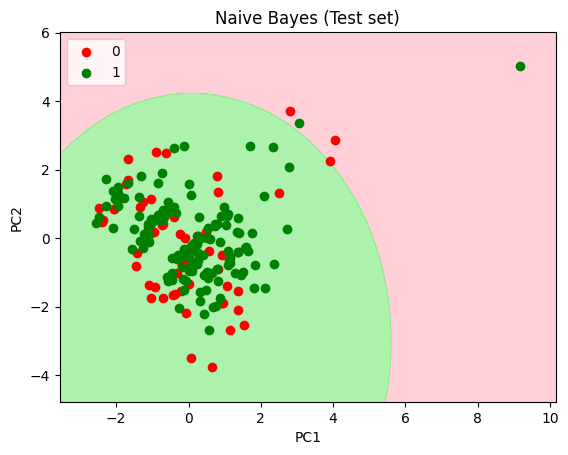

In [347]:
#The test set results visualized which we got through 
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('pink', 'lightgreen')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

In [348]:
#logistic regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [349]:
y_pred = classifier.predict(X_test)

In [350]:
from sklearn import metrics
print('The accuracy of Logistic Regression is: ', metrics.accuracy_score(y_pred, y_test))

The accuracy of Logistic Regression is:  0.7073170731707317


In [351]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)


In [352]:
cm

array([[  0,  60],
       [  0, 145]], dtype=int64)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


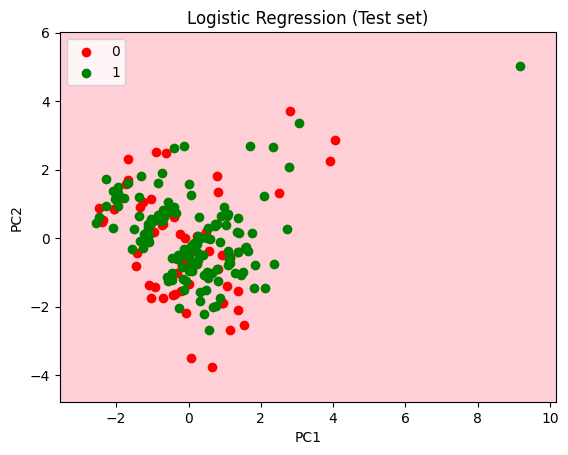

In [353]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('pink', 'lightgreen')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()